# Demonstration of Graphic facilities in gstlearn package

The module gstlearn.plot contains various plot functions for gstlearn objetcs: DbGrid, Db, Vario, Model, Polygons... These functions are also accesible as methods of each class. For example for a grid, we could use equivalently gp.grid(mygrid,...) or mygrid.plot(...), or for more specific functions: gp.point(mygrid,...) or mygrid.plot_point(...)

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Import packages

In [2]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib
import matplotlib.pyplot as plt
import gstlearn as gl
import gstlearn.plot as gp
from scipy import ndimage, misc 

We define the Space dimension

In [3]:
gl.defineDefaultSpace(gl.ESpaceType.RN, 2)
gp.setDefault(dims=[6,6])

Creating a dummy Model used for simulating a random field and display it

In [4]:
ctxt = gl.CovContext() # use default space
mymodel = gl.Model(ctxt)
cova = gl.CovAniso(gl.ECov.CUBIC,10,1,1.5,mymodel.getContext())
mymodel.addCov(cova)

This first case gives the demonstration that we can combine gstlearn.plot functions with matplotlib functions. This is what is performed by representing a Model and adding some annotation.
As an example, we wish to add the formula of the covariance represented, i.e.:

In [5]:
from IPython.display import display, Latex
display(Latex('$%s$'%cova.getFormula()))

<IPython.core.display.Latex object>

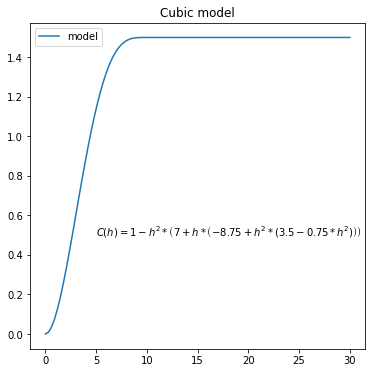

In [6]:
fig, ax = gp.init()
ax.plotGst(mymodel, flagLegend=True)
ax.decoration(title="Cubic model")
ax.text(5,0.5,'$%s$'%cova.getFormula(),size='medium')
plt.show()

## Grid representations

We create a rectangular non-rotated 2-D grid, and simulate random Gaussian field (using the Model previously defined). Two simulations are generated in order to emphasize the graphic posibilities in further parts of this note.

In [7]:
nx = [70,25]
dx = [1,2]
x0 = [-40, 20]
mygrid = gl.DbGrid.create(nx,dx,x0)

err = gl.simtub(None,mygrid,mymodel,None,2)
mygrid.display()


Data Base Grid Characteristics

Data Base Summary
-----------------
File is organized as a regular grid
Space dimension              = 2
Number of Columns            = 5
Maximum Number of UIDs       = 5
Total number of samples      = 1750

Grid characteristics:
---------------------
Origin :    -40.000    20.000
Mesh   :      1.000     2.000
Number :         70        25

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = x1 - Locator = x1
Column = 2 - Name = x2 - Locator = x2
Column = 3 - Name = Simu.1 - Locator = z1
Column = 4 - Name = Simu.2 - Locator = z2
 

Add a dummy selection to test visualization with Selection

In [8]:
mygrid["sel"] = 1. - (mygrid["x1"] > 0) * (mygrid["x1"] < 15) * (mygrid["x2"] > 40) * (mygrid["x2"] < 50)
mygrid.setLocator("sel",gl.ELoc.SEL)

### Global parameters

gstlearn.plot gives the oppotunity to store somme global parameters. Their list is given by the following function where we can clearly see those dedicated to **geographical** representations (the other ones are called **standard** representations).

In [9]:
gp.printDefault()

Non geographical defaults:
- Figure dimensions = [6, 6]
- Limits along X (not defined)
- Limits along Y (not defined)
- Aspect = auto
Geographical defaults:
- Figure dimensions = [8, 8]
- Limits along X (not defined)
- Limits along Y (not defined)
- Aspect = 1


Two functions (i.e. **setDefault** and **setDefaultGeographic**) allow changing the default values.

### Non Rotated Grid

We simply represent the grid (using the defaulted color scale). As no variable nor representation is explicitely specified, the default variable is represented using the default representation (i.e. raster). The default variable is the first Z-locator variable (if any) or the variable created last in the file otherwise.

We also plot the legend on the right edge.  

This is the opportunity to describe the mechanism for calling the functions of gstlearn.plot.

We have essentially 4 possible levels of calls:

- the most elementary one. We initiate the figure (returned argument *fig*) and the canvas (returned argument *ax*) as a **geographical** figure. Then we add a raster visualization of the first simulation. The dedicated function (**gridRaster**) returns a description of the intended facility (here a *QuadMesh*). This enables the user to elaborate on this returned argument.

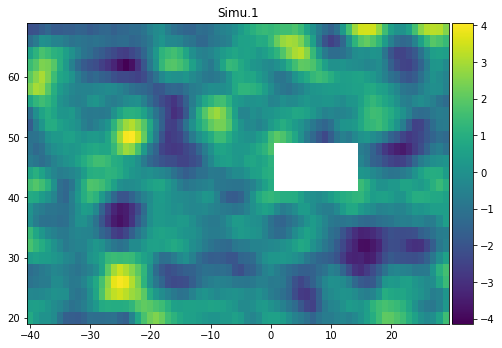

In [10]:
fig, ax = gp.initGeographic()
gp.gridRaster(ax, mygrid, name="Simu.1", flagLegend=True)

- a second version which suits with the object-based technique. The function **gridRaster** has been added as a method for the matplotlib.Axes object (*ax*). On this case, we also added the isovalue representation of the second simulation outcome.

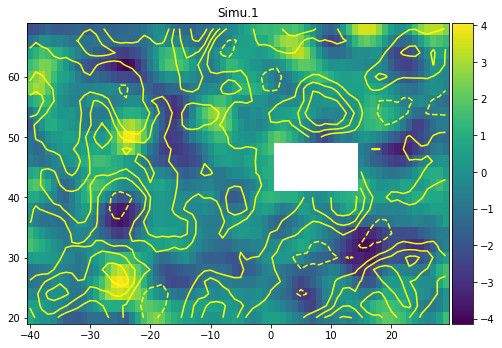

In [11]:
fig, ax = gp.initGeographic()
ax.gridRaster(mygrid, name="Simu.1", flagLegend=True)
ax.gridContour(mygrid, name="Simu.2", levels=[-2,0,1,2,3,4,5,6,7,8], colors="yellow", flagLegend=False)

- We can manipulate these options in a more *package* way. The function **gridGst** offers a combinaison of pre-defined representation modes that can be triggered in a single call. Conversely, some arguments need to be made more explict: this is the case, for example, of the name of the variables for the different representations.

<AxesSubplot:title={'center':'Simu.1 (Raster) Simu.2 (Contour) '}>

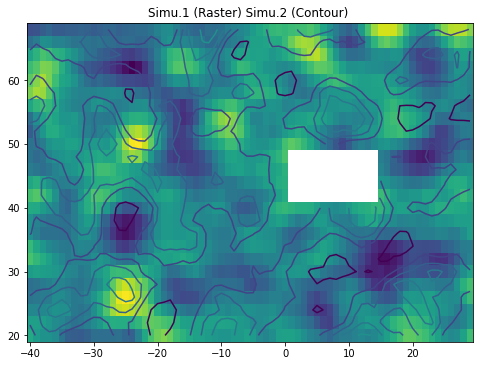

In [12]:
fig, ax = gp.initGeographic()
ax.gridGst(mygrid,name_raster="Simu.1",name_contour="Simu.2",levels=[-2,0,1,2,3,4,5,6,7,8]) 

- the most elaborate solution where the user does not have to call the relevant function according to the (gstlearn) object to be represented. The choice of the most adequate type of representation if performed based on the nature of the object to be represented.

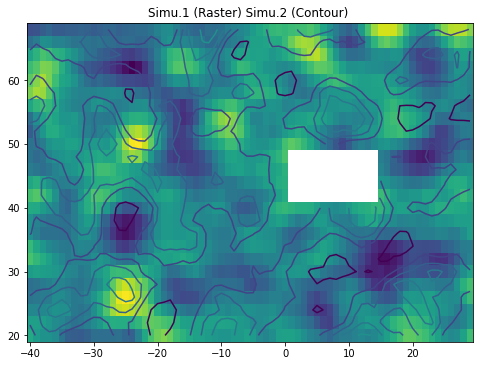

In [13]:
fig, ax = gp.initGeographic()
ax.plotGst(mygrid,name_raster="Simu.1",name_contour="Simu.2",levels=[-2,0,1,2,3,4,5,6,7,8])

We can also overwrite the automatic representation choice, as it is demonstrated next. As a matter of fact, we wish to represent the grid nodes as a set of points, whose size will corespond to the first simulation and whose color will correspond to the second simulation.
In this last representation, we will also overwrite the title, replacing the automatically generated title (gluing the variable names and their representation modes) by our favorite title. We also add some specific labels on axes.

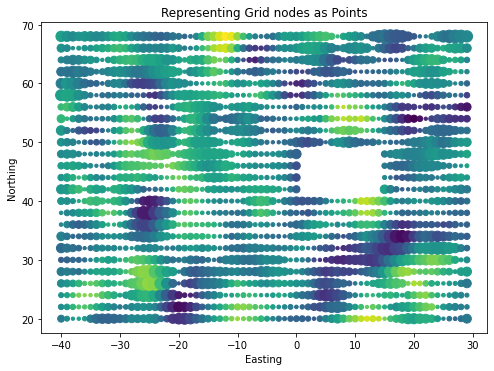

In [14]:
fig, ax = gp.initGeographic()
ax.plotGst(mygrid,asPoint=True,name_size="Simu.1",name_color="Simu.2")
ax.decoration(title = "Representing Grid nodes as Points", xlabel="Easting", ylabel="Northing")

We can create a specific ColorScale, containing a limited number of colors, and sampling a given reference Color Scale. 

For the next figure, we use the one defaulted by the system ('viridis') for sake of understanding. We simply reduce the number of colors

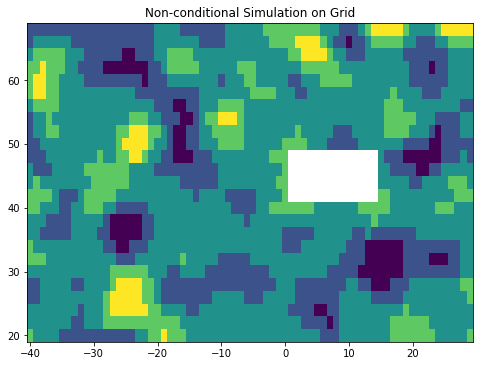

In [15]:
cmap = gp.get_cmap(5,'viridis')
fig, ax = gp.initGeographic()
ax.plotGst(mygrid, cmap=cmap)
ax.decoration(title="Non-conditional Simulation on Grid")

We can also change the reference color scale (using the one defaulted by the method get_cmap for example: 'gist rainbow') and increase the number of colors

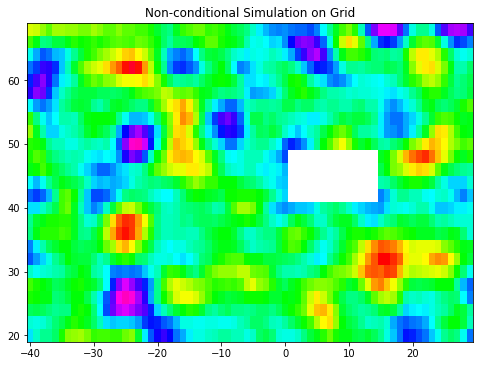

In [16]:
cmap = gp.get_cmap(100)
fig, ax = gp.initGeographic()
ax.plotGst(mygrid,cmap=cmap)
ax.decoration(title="Non-conditional Simulation on Grid")

We have the same levels of abstraction as demonstrated for representing a grid, for objects such as histograms of the values collected in the a data base (e.g. a simulation outcome over the grid). 

- calling the relevant function explicitely. Note that the returned argument for a histogram is nothing but a matplotlib.Axes.

<AxesSubplot:title={'center':'Simu.1'}, xlabel='Values', ylabel='Count'>

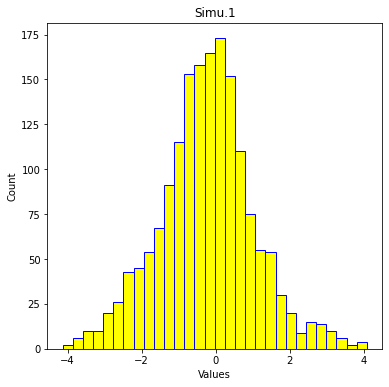

In [17]:
fig, ax = gp.init()
gp.histGeneral(ax, mygrid,name="Simu.1", bins=30, color='yellow', edgecolor="blue")

- calling the relevant function in an object-based fashion

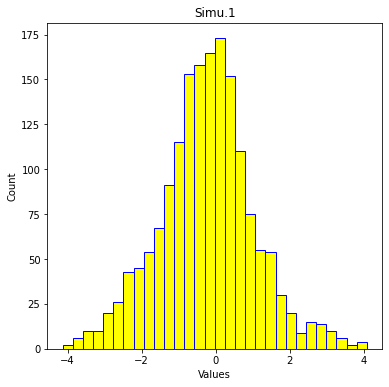

In [18]:
fig, ax = gp.init()
ax = ax.histogram(mygrid,name="Simu.1", bins=30, color='yellow', edgecolor="blue")

- calling the data base generic function. Then, we need to specify the type of representation. We slightly changed the decoration of the figure.

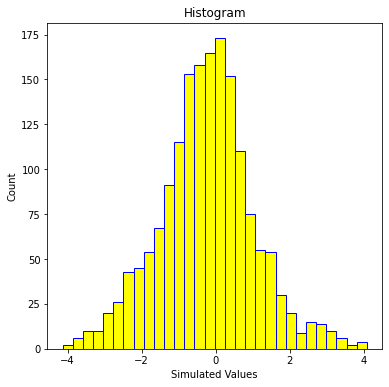

In [19]:
fig, ax = gp.init()
ax.plotGst(mygrid, name="Simu.1", asHisto=True, bins=30, color='yellow', edgecolor="blue")
ax.decoration(xlabel="Simulated Values",ylabel="Count",title="Histogram")

Representing a scatter plot between two variables stored on the same Db. Again we demonstrate two different ways of calling the functions.

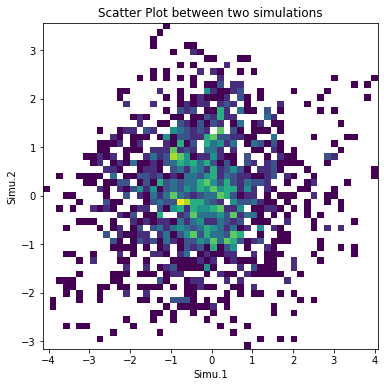

In [20]:
fig, ax = gp.init()
ax.correlation(mygrid,"Simu.1","Simu.2", bins=50, cmin=1)
ax.decoration(title="Scatter Plot between two simulations")

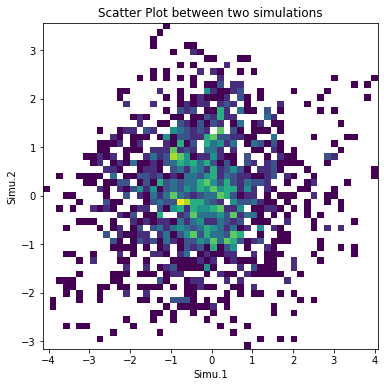

In [21]:
fig, ax = gp.init()
ax.plotGst(mygrid,asCorrel=True,namex="Simu.1",namey="Simu.2", bins=50, cmin=1)
ax.decoration(title="Scatter Plot between two simulations")

### Set of Points and Polygon

A set of points is sampled from the previous Grid and stored in a new Point Db. The number of samples if fixed to 1% of the number of grid nodes.

In [22]:
mypoint = gl.Db()
mypoint.resetSamplingDb(mygrid,0.01)
mypoint.display()


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of Columns            = 6
Maximum Number of UIDs       = 6
Total number of samples      = 17
Number of active samples     = 17

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = x1 - Locator = x1
Column = 2 - Name = x2 - Locator = x2
Column = 3 - Name = Simu.1 - Locator = z1
Column = 4 - Name = Simu.2 - Locator = z2
Column = 5 - Name = sel - Locator = sel
 

We create a polygon as the convex hull of the samples

In [23]:
mypoly = gl.Polygons.createFromDb(mypoint)

We now display the points and the polygon on top of the grid: the overlay is ensured by using the argument 'ax'. Here, we can appreciate the use of the generic plotting function.

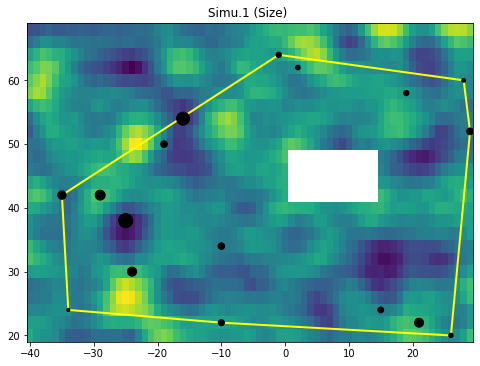

In [24]:
fig, ax = gp.initGeographic()
ax.plotGst(mygrid)
ax.plotGst(mypoly,flagFace=False, edgecolor='yellow', linewidth=2)
ax.plotGst(mypoint,color="black")

### Rotated grid (angle = 20 degrees)

We create the same grid as before but with a rotation of 20 degrees.

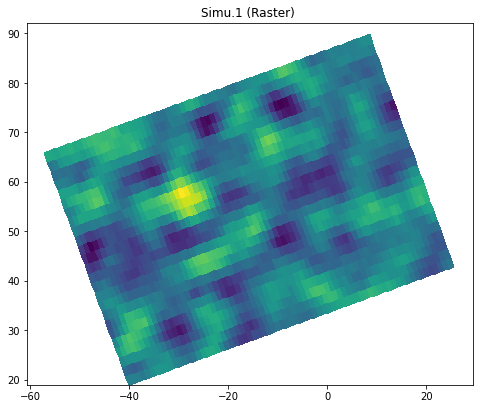

In [25]:
mygrid = gl.DbGrid.create(nx,dx,x0,[20,0])
err = gl.simtub(None,mygrid,mymodel,nbsimu=2)
fig, ax = gp.initGeographic()
ax.plotGst(mygrid,name_raster="Simu.1")

A new set of Points is sampled from the rotated Grid. As the same seed is used, the ranks of the selected samples within the grid are the same. Furthermore, we generate the Polygon as the convex hull of the newly created Point db.

In [26]:
mypoint = gl.Db()
mypoint.resetSamplingDb(mygrid,0.01)
mypoly = gl.Polygons.createFromDb(mypoint)

We represent again the three components (grid, points and polygon) on the same view

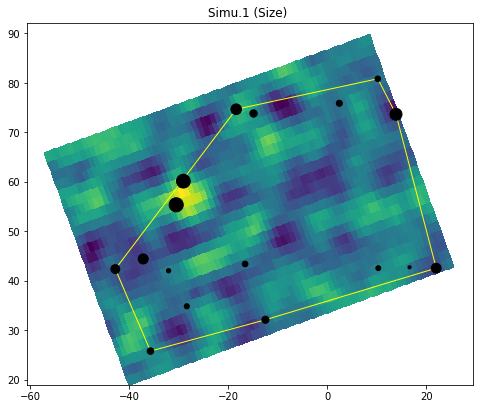

In [27]:
fig, ax = gp.initGeographic()
ax.plotGst(mygrid)
ax.plotGst(mypoly,flagFace=False,edgecolor='yellow')
ax.plotGst(mypoint,color="black")

Let us now add a selection in order to restrict the previous representation to the only non-masked samples

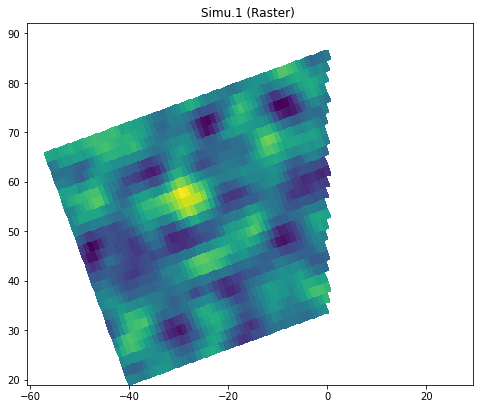

In [28]:
tab = mygrid.getColumn("x1")
sel = (np.asarray(tab) < 0).astype(float)
mygrid.addSelection(tuple(sel),'sel')

fig, ax = gp.initGeographic()
ax.plotGst(mygrid,name_raster="Simu.1",usesel=True)

## Share legend between two plots
This paragraph is meant to present the possibility of splitting a figure in two scenes, to represent a grid in each scene (for example) and share the (same) color scale for the two scenes.

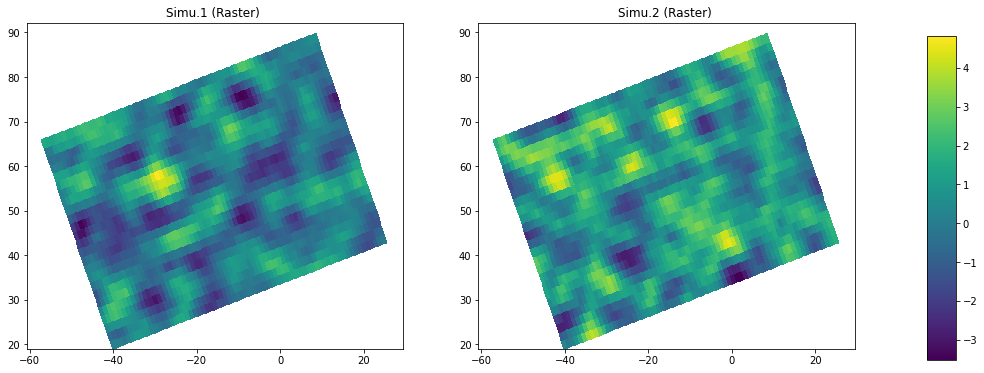

In [29]:
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(1,2,1)
ax1.plotGst(mygrid,name_raster="Simu.1", usesel=False, flagLegendRaster = False)
ax2 = fig.add_subplot(1,2,2)
ax2.plotGst(mygrid,name_raster="Simu.2", usesel=False, flagLegendRaster = False)

fig.subplots_adjust(right=0.7)
cbar_ax = fig.add_axes([0.75, 0.1, 0.02, 0.75])

im = ax.collections[0] # get mappable described by the colorbar
err = fig.colorbar(im, cax = cbar_ax)

## Display points with fixed colors

In this paragraph, we wish to display sample points with given colors. 

In [30]:
tab = [1., 1., 1., 2., 2., 3., 3., 3., 5.]
dat1 = gl.Db.createFromSamples(3, gl.ELoadBy.SAMPLE, tab, ["x","y","z"], ["x1","x2","z"])
dbfmt = gl.DbStringFormat()
dbfmt.setFlags(flag_resume=True, flag_array=True)
dat1.display(dbfmt)


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of Columns            = 4
Maximum Number of UIDs       = 4
Total number of samples      = 3

Data Base Contents
------------------
                 rank         x         y         z
     [  0,]     1.000     1.000     1.000     1.000
     [  1,]     2.000     2.000     2.000     3.000
     [  2,]     3.000     3.000     3.000     5.000

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = x - Locator = x1
Column = 2 - Name = y - Locator = x2
Column = 3 - Name = z - Locator = z1
 

We represent the samples without using any pre-specified color map. The system uses the default color scale and assigns the lowest value to be represented to the first color and the largest value to the last color.
For all subsequent graphics, the dimensions of the non-geographical plots is fixed.

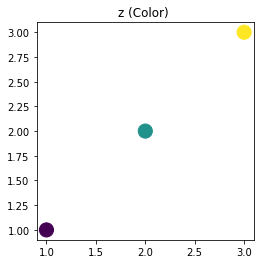

In [31]:
gp.setDefaultGeographic(dims=[5,4])
fig, ax = gp.initGeographic()
ax.plotGst(dat1,name_color="z",size=200)

Representing using a given color map (based on few colors [5]). The color scale is now discrete but the system still assigns the lowest value (i.e. 1) to the first color and the largest value (i.e. 5) to the last color

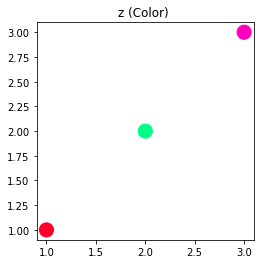

In [32]:
ncol = 5
cmap = gp.get_cmap(ncol)
fig, ax = gp.initGeographic()
ax.plotGst(dat1,name_color="z",size=200,cmap=cmap)

We use a new Db where the values at first sample has been modified (from 1 to 4) while the other have been left unchanged. We use the same color scale as before. Again the lowest value (i.e. 3) is assigned to the first color and the largest value (i.e. 5) to the last color.

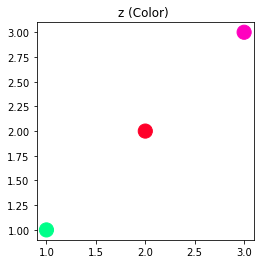

In [33]:
tab = [1., 1., 4., 2., 2., 3., 3., 3., 5.]
dat2 = gl.Db.createFromSamples(3, gl.ELoadBy.SAMPLE, tab, ["x","y","z"], ["x1","x2","z"])

fig, ax = gp.initGeographic()
ax.plotGst(dat2,name_color="z",size=200,cmap=cmap)

Default dimensions for Geographical plots are set back to larger dimensions for subseauqnt graphics

In [34]:
gp.setDefaultGeographic(dims=[8,8])

# Superimposing figures

In this section, we demonstrate the possibilities offered by the graphics for working with multiple figures and overlaying graphics. This is described through the use of variograms and models.
For this reason we consider the two non-conditional simulations created earllier on the existing grid. We calculate the simple and cross variograms along the two main axes of the grid and fit a model automatically.

In [35]:
varioparam = gl.VarioParam.createMultipleFromGrid(npas=10)
vario = gl.Vario(varioparam, mygrid)
err = vario.compute(gl.ECalcVario.VARIOGRAM)

model = gl.Model()
err = model.fit(vario,[gl.ECov.CUBIC])

### Several ways for displaying experimental variograms

In the next graphic, we produce the simple variogram of the first variable calculated in the first direction

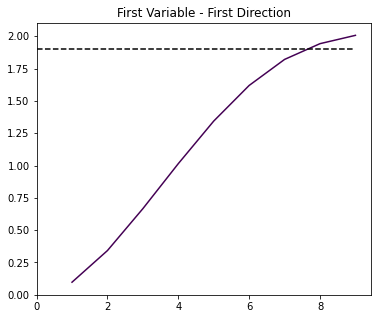

In [36]:
fig, ax = gp.init()
ax.plotGst(vario)
ax.geometry(dims=[6,5])
ax.decoration(title="First Variable - First Direction")

In the next graphic, we produce a single figure where the variograms of the first variable calculated in the first direction (black) and the second direction (red) are overlaid. The overlay is performed manually.

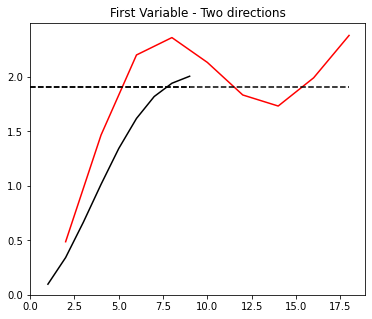

In [37]:
fig, ax = gp.init()
ax.plotGst(vario,color="black")
ax.plotGst(vario,idir=1, color='red')
ax.decoration(title="First Variable - Two directions")
ax.geometry(dims=[6,5])

In the next graphic, we produce a single graphic where the cross-variograms between first and second variables are displayed for all directions. The colors are extracted from the Color Map provided as argument.

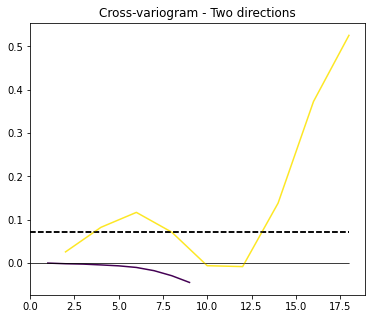

In [38]:
fig, ax = gp.init()
ax.plotGst(vario,ivar=1,jvar=0,idir=-1)
ax.decoration(title="Cross-variogram - Two directions")
ax.geometry(dims=[6,5])

In the next figure, we draw the first direction and overlay the second direction (on purpose using two orders). Moreover we also change the dimensions of the plot.

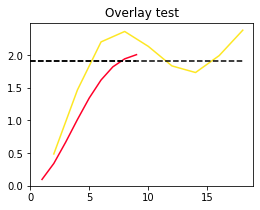

In [44]:
fig, ax = gp.init()
ax.plotGst(vario,idir=0,cmap=cmap)
ax.plotGst(vario,idir=1)
ax.decoration(title="Overlay test")
ax.geometry(dims=[4,3])

All graphic representations that were produced up to now were essentially performed with either a single view (or Axes). The exercise performed earlier with two view in the same figure was handled by the user, calling **subplots** facility explicaitly.

In the next examples, we will directly consider a figure consituted of many views. This is the case of the multivariate variograms and/or models. In other words, we wish to call the graphic representation, providing a single multivariate variogram and let the facility create all the necessary subplots. Moreover, we want to be able to consider this set of subplots (containing the experimental variograms for example) and overlay the model.

This requires using the other argument (**fig**) returned by the graphic initialization function (**gp.init**) which is called passing the expected number of rows and columns to be present in the figure. In our case, as the variogram is calculated for 2 variables, the figure should contain 2 rows and 2 columns.

Representing all simple and cross variograms for all directions. 

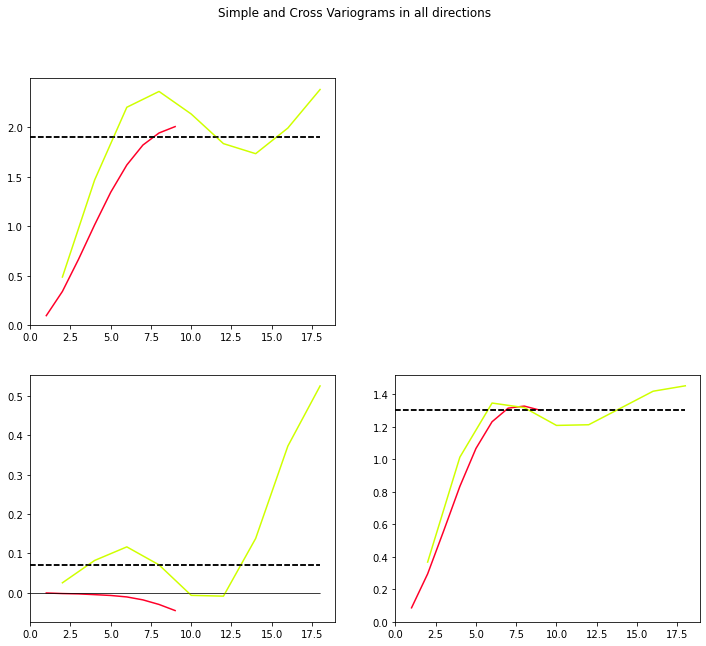

In [45]:
fig, axs = gp.init(2,2)
fig.vario(vario,ivar=-1,jvar=-1,idir=-1,cmap=cmap)
fig.decoration(title="Simple and Cross Variograms in all directions")
fig.geometry(dims=[6,5])

### Several ways for representing the Model

Represent the Model calculated for the second variable. If the Model is not isotropic, the plot should differ per direction: as direction has not been mentionned, the first direction (of the geographic sysrtem) is used by default.

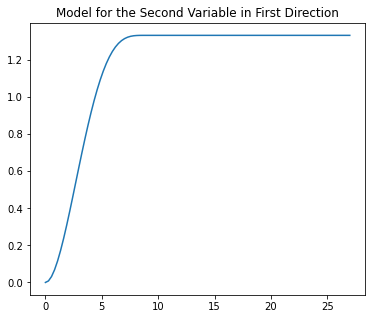

In [46]:
fig, ax = gp.init()
ax.plotGst(model,ivar=1,jvar=1)
ax.decoration(title="Model for the Second Variable in First Direction")
ax.geometry(dims=[6,5])

Representing all simple and cross variograms together with the fitted model for the first direction. This is directly provided by the function varmod.

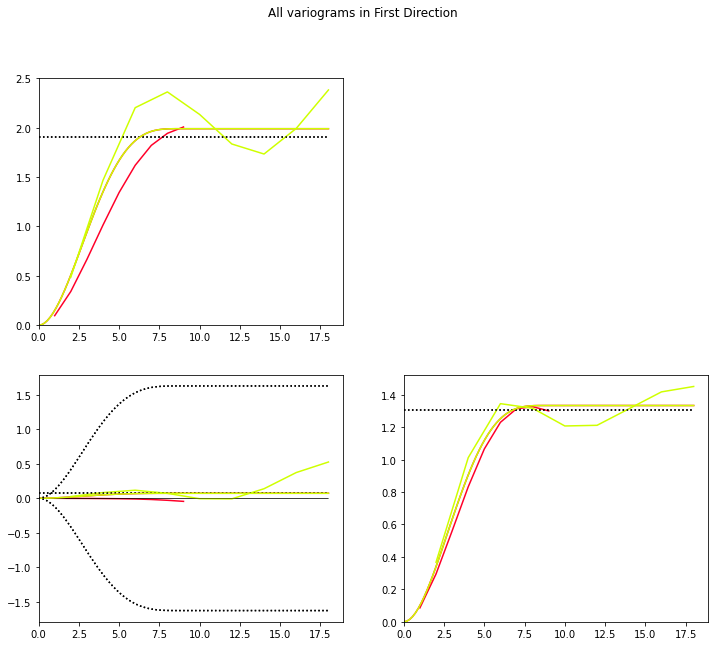

In [47]:
fig, axs = gp.init(2,2)
fig.varmod(vario=vario, model=model, cmap=cmap)
fig.decoration(title="All variograms in First Direction")
fig.geometry(dims=[6,5])

### Testing figure Overlay

The next figure is meant to demonstrate the overlay possibilities. We first represent the experimental variograms for all variable (in the first direction only to be legible). Then we overlay the model ... only over the experimental simple variogram of the second variable (in dashed blue).

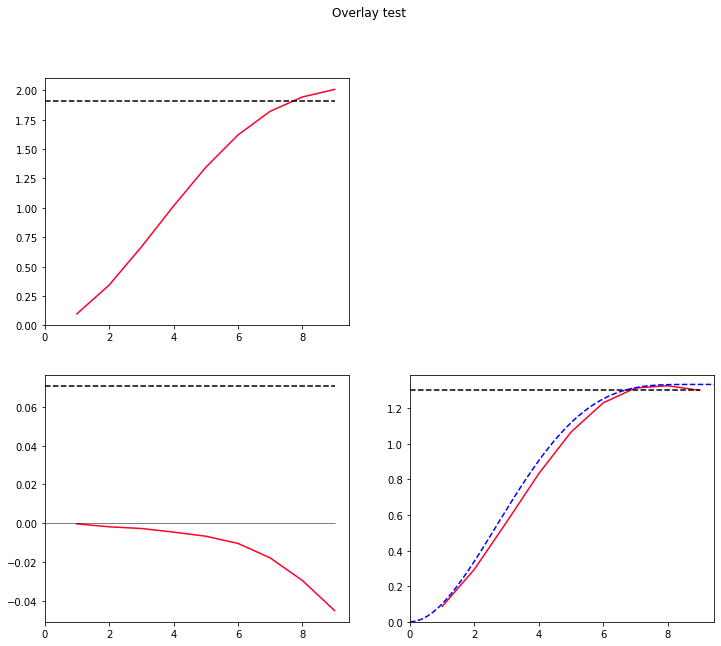

In [43]:
fig, axs = gp.init(2,2)
fig.vario(vario=vario,idir=0,ivar=-1,jvar=-1,cmap=cmap)
axs[1,1].plotGst(model,ivar=1,jvar=1,codir=vario.getCodirs(0),hmax = vario.getHmax(),
               linestyle = 'dashed', color='blue')
fig.decoration(title="Overlay test")
fig.geometry(dims=[6,5])